# Example 5. k-Nearest Neighbor, KNN
---

The *k*-nearest neighbor classifier (KNN) is kind of **lazy learner** which is different from the previous learners that learn a classification model or discriminative function. KNN is a memery-based algorithm that gets prediction by comparing the testing data and training data, i.e. it does not learn a model from training data. The prediction is based on the votes of ***k*** training data points which are near to the test data by measuring the **distance metric** of features ***d***. The distance metric of two data points $i$ and $j$ in **sciki-learn** is defined by ***Minkowski metric*** as

$$
\begin{equation}
d(X^{(i)},X^{(j)}) = (\sum_{r}\left|\,x_{r}^{(i)}-x_{r}^{(j)}\,\right|^p)^{\frac{1}{p}}\ ,
\end{equation}
$$

where $X$ is the feature set, and each feature $x$ is denoted by $r$. When $p=1$, the distance metric is called ***taxicab metric*** or ***Manhattan distance*** which is only allowed the horizontal and vertial measuring. When $p=2$, the distance metric is called ***Euclidean distance*** which is allowed the circular measuring.

Technically, KNN uses **tree algorithm** to build the connection between testing data point and ***k*** training data points by certain distance metric of features. In **sciki-learn**, it inclueds the options of tree algorithms and the weights of the edges. Here we only shows the changes of distance metrics.  

## Import data

In [1]:
from sklearn import datasets
import numpy as np

from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0 )
sc = StandardScaler()
sc.fit(X_train)
X_train_std    = sc.transform(X_train)
X_test_std     = sc.transform(X_test)
X_combined_std = np.vstack( (X_train_std, X_test_std) )
y_combined     = np.hstack( (y_train, y_test) )

## k-nearest neighbor classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier

### 1. Manhattan distance p=1

The distance metric is defined as

$$
\begin{equation}
d(X^{(i)},X^{(j)}) = \sum_{r}\left|\,x_{r}^{(i)}-x_{r}^{(j)}\,\right|\ ,
\end{equation}
$$

In [6]:
knn_p1 = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')
knn_p1.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

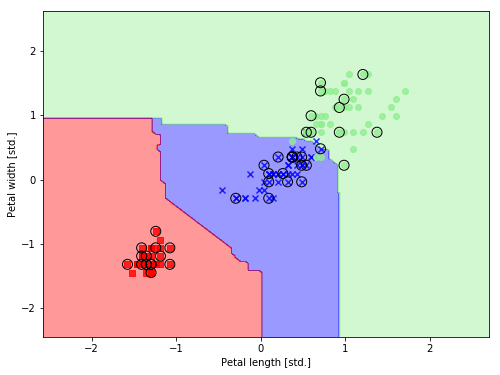

In [7]:
plt.figure(figsize=(8, 6))
plot_decision_regions( X_combined_std, y_combined, classifier=knn_p1, test_idx=range(105,150) )
plt.xlabel('Petal length [std.]')
plt.ylabel('Petal width [std.]')
plt.show()

### 2. Euclidean distance p=2

The distance metric is defined as

$$
\begin{equation}
d(X^{(i)},X^{(j)}) = \sqrt{\sum_{r}\left(\,x_{r}^{(i)}-x_{r}^{(j)}\,\right)^2}\ ,
\end{equation}
$$

In [8]:
knn_p2 = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_p2.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

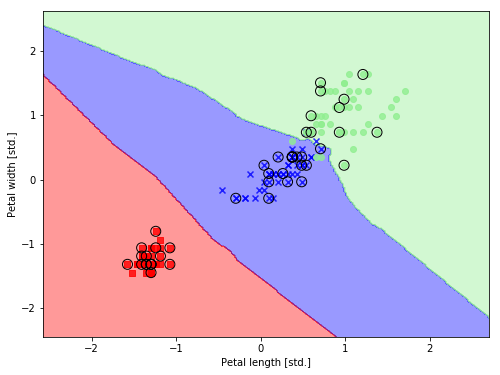

In [9]:
plt.figure(figsize=(8, 6))
plot_decision_regions( X_combined_std, y_combined, classifier=knn_p2, test_idx=range(105,150) )
plt.xlabel('Petal length [std.]')
plt.ylabel('Petal width [std.]')
plt.show()

### Conclusion
By comparing two definations of distance metrics, the boundary of **Euclidean distance** ($p=2$) is much smooth than **Manhattan distance** ($p=1$), since **Manhattan distance** is only allowed to be measured with horizontal and vetical way. Thus, **Euclidean distance** ($p=2$) is much usual than **Manhattan distance** ($p=1$).